In [1]:
import math as math
import matplotlib.pyplot as plt
import numpy as np
import csv
import lmfit
from scipy import stats
import ROOT as r
from scipy import optimize as opt

Welcome to JupyROOT 6.20/04


For the past few lectures, we have been considering uncertainties that we have defined to be the variance of a distribution, but what exactly do they mean. Lets go back to the p-value definition, given a pdf $p\left(x|\theta\right)$
\begin{eqnarray}
P(x|\theta,x\in \Delta) & = &  \int_{x}^{x+\Delta} p\left(x|\theta\right) dx \\
P_{right}(x|\theta, x\leq x_{0}) & = &  \int_{-\infty}^{x} p\left(x|\theta\right) dx
\end{eqnarray}
The bottom integral is the cumulative distribution function(cdf), we can use this to derive relationships to the variances of distributions. Simply put we can compute the probability within various intervals of a distribution.  Since the normal(gaussian) distributions, we typically thing of things in this form
\begin{equation}
\mathcal{N}(0,1) = \frac{x-\bar{x}}{\sigma}
\end{equation}
Lets play around with a few. 

In [2]:
#Lets do some integrals
p50=stats.norm.cdf(0)
p1=stats.norm.cdf(1)
p2=stats.norm.cdf(2)
p3=stats.norm.cdf(3)
p5=stats.norm.cdf(5)
pM1=stats.norm.cdf(-1)
pM2=stats.norm.cdf(-2)
pM3=stats.norm.cdf(-3)
pM5=stats.norm.cdf(-5)
print(p50,p1,p2,p3,pM1,pM2,pM3)

#Whats the probability of things fluctuation more that 1\sigma
print(p1-pM1,"within 1 standard deviations")
print(p2-pM2,"within 2 standard deviations")
print(p3-pM3,"within 3 standard deviations")
print(p5-pM5,"within 5 standard deviations")

#Sometimes we only consider 1-sided p-values
print((1.-p1),"to fluctuate above 1 standard deviation")
print((1.-p3),"to fluctuate above 3 standard deviation")
print((1.-p5),"to fluctuate above 5 standard deviation")

(0.5, 0.8413447460685429, 0.9772498680518208, 0.9986501019683699, 0.15865525393145707, 0.022750131948179195, 0.0013498980316300933)
(0.6826894921370859, 'within 1 standard deviations')
(0.9544997361036416, 'within 2 standard deviations')
(0.9973002039367398, 'within 3 standard deviations')
(0.9999994266968562, 'within 5 standard deviations')
(0.15865525393145707, 'to fluctuate above 1 standard deviation')
(0.0013498980316301035, 'to fluctuate above 3 standard deviation')
(2.866515719235352e-07, 'to fluctuate above 5 standard deviation')


These probability values define what we call confidence intervals. We often also write these as z-scores namely for a measurement the z-score is the probability that a measurement is within $z$ standard deviations of a distribtuion. 
\begin{equation}
\bar{x}\pm z \sigma
\end{equation}
Z-scores are often synonymously considered in the context of gaussian distribtuions ie a z-score is one standard deviation in either direction, and the devitaiton is symmetric. However there is no gaurantee that this needs to be the case. Lets consider the confidence intervals of an asymmetric distribtuion

('two tail values:', 19.02276779864163, 2.7003894999803584)
('one tail values:', 16.918977604620448, 3.3251128430668158)


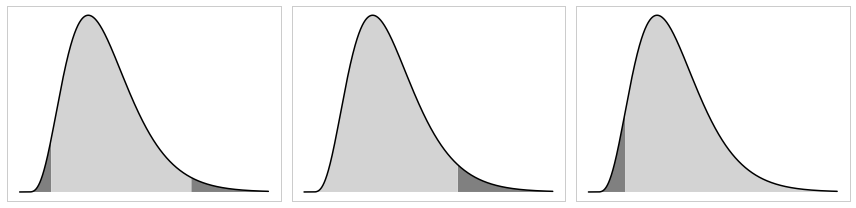

In [3]:
#code stolen from here: https://aegis4048.github.io/comprehensive_confidence_intervals_for_python_developers
#Note this needs to be python3
df = 9
x = np.linspace(-1, 28, 1000)
y = stats.chi2.pdf(x, df, loc=0, scale=1)

# two-tailed
#Note we will use this cool function percent poitn function(ppf), which inverts the cdf 
two_right_tail = stats.chi2.ppf(1 - 0.025, df)
two_left_tail = stats.chi2.ppf(1 - 0.975, df)
print("two tail values:",two_right_tail,two_left_tail)

# one tailed
one_right_tail = stats.chi2.ppf(1 - 0.05, df)
one_left_tail = stats.chi2.ppf(1 - 0.95, df)
print("one tail values:",one_right_tail,one_left_tail)

plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

for ax in axes:
    ax.plot(x, y, c='black')
    ax.grid(False)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

axes[0].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
axes[0].fill_between(x, 0, y, where=(np.array(x) > two_left_tail) & (np.array(x) < two_right_tail), facecolor='lightgrey')
axes[0].fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
#axes[0].title('Two-tailed', fontsize=20)
#axes[0].text(14, 0.08, r'$H_0: \sigma^2 = \sigma_0^2$', fontsize=20)
#axes[0].text(14, 0.057, r'$H_a: \sigma^2 \neq \sigma_0^2$', fontsize=20)

axes[1].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) < one_right_tail), facecolor='lightgrey')
axes[1].fill_between(x, 0, y, where=(np.array(x) > one_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
#axes[1].title('Upper/right-tailed', fontsize=20)
#axes[1].text(14, 0.08, r'$H_0: \sigma^2 \leq \sigma_0^2$', fontsize=20)
#axes[1].text(14, 0.057, r'$H_a: \sigma^2 > \sigma_0^2$', fontsize=20)

axes[2].fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= one_left_tail), facecolor='grey')
axes[2].fill_between(x, 0, y, where=(np.array(x) > one_left_tail) & (np.array(x) <= max(x)), facecolor='lightgrey')
#axes[2].title('Lower/left-tailed', fontsize=20)
#axes[2].text(14, 0.08, r'$H_0: \sigma^2 \geq \sigma_0^2$', fontsize=20)
#axes[2].text(14, 0.057, r'$H_a: \sigma^2 < \sigma_0^2$', fontsize=20)

fig.tight_layout()


(8.733544498271643, 4.063477487892093)


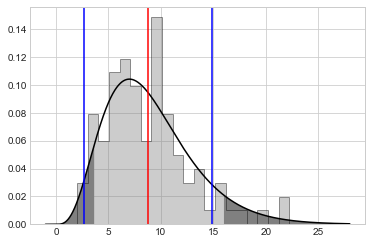

(-0.18039635283746155, 11.4794545756463)


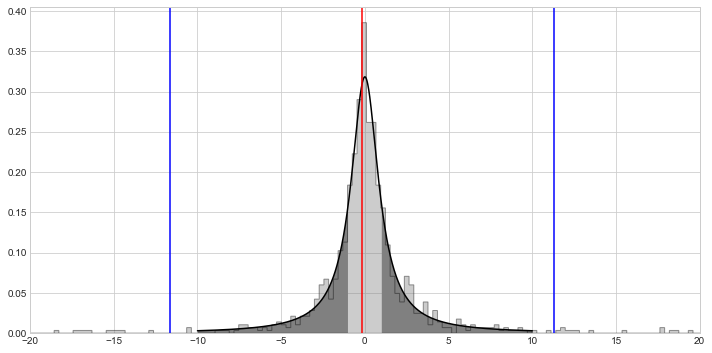

In [30]:
#Lets compute the mean and RMS of a sample from this distribution
df=9
y_chi2 = stats.chi2.rvs(size=100,df=df)
print(y_chi2.mean(),y_chi2.std())
z=1.5
x = np.linspace(-1, 28, 1000)
y = stats.chi2.pdf(x, df, loc=0, scale=1)
two_right_tail = stats.chi2.ppf(1 - stats.norm.cdf(-z), df)
two_left_tail = stats.chi2.ppf(1 - stats.norm.cdf(z), df)

plt.style.use('seaborn-whitegrid')
plt.plot(x, y, c='black')
plt.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
plt.fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
plt.hist(y_chi2, histtype='stepfilled', edgecolor='k', alpha=0.4, color='gray', density=True,bins=20)
plt.axvline(y_chi2.mean(), c='red')
plt.axvline(y_chi2.mean()+y_chi2.std()*z, c='blue')
plt.axvline(y_chi2.mean()-y_chi2.std()*z, c='blue')
plt.show()
#Lets try this with an even crazier distribution
#https://en.wikipedia.org/wiki/Cauchy_distribution
fig, ax = plt.subplots(figsize=(12, 6))
plt.xlim([-20, 20])
y_cauchy = stats.cauchy.rvs(size=1000)
print(y_cauchy.mean(),y_cauchy.std())

z=1.0
x = np.linspace(-10, 10, 1000)
y = stats.cauchy.pdf(x, loc=0, scale=1)
two_right_tail = stats.cauchy.ppf(1 - stats.cauchy.cdf(-z))
two_left_tail = stats.cauchy.ppf(1 - stats.cauchy.cdf(z))

plt.plot(x, y, c='black')
plt.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= two_left_tail), facecolor='grey')
plt.fill_between(x, 0, y, where=(np.array(x) > two_right_tail) & (np.array(x) <= max(x)), facecolor='grey')
plt.hist(y_cauchy, histtype='stepfilled', edgecolor='k', alpha=0.4, color='gray', density=True,bins=1000)
plt.axvline(y_cauchy.mean(), c='red')
plt.axvline(y_cauchy.mean()+y_cauchy.std()*z, c='blue')
plt.axvline(y_cauchy.mean()-y_cauchy.std()*z, c='blue')
plt.show()

So you see that with certain types of distribtuions things can deviate wildly from what is expected. Namely in the case of a cauchy or asymmetric distribtuion, the standard deviation of a data sample is not a reflection of the p-value of the distribtuion at all. To describe this distribtuion there are a number of ways to mitigate this issue. The first is to introduce higher order moments of a pdf. 

Lets assume our distributions are centered about zero (we can always re center them. The we can write moments as
\begin{equation}
 \mu_{n}=m^{n}(x)=E[x^{n}p(x)] = \int_{-\infty}^{\infty} x^{n} p(x) dx
\end{equation}

The mean  $E[p(x)]=m^{1}(x)$, the variance of the distribtuion is just $V[p(x)]=m^{2}(x)$. These you should know and love by now, but we can keep going in moments to get more distribtuions. The next moment is skewness, this tells you how asymmetric a distribtuion is. Skew$=m^{3}(x)$, and going further we have the Kurtosis$=m^{4}(x)$ this tells you how important the tails of a distribution are. 

There are lots of distribtuions in data. Here is a "story book of distributions":
http://bois.caltech.edu/dist_stories/t3b_probability_stories.html#Cauchy-distribution

Lets take a look at the moments of our two example distribtuions above. 

('normal mean:', 0.00221801982329231)
('normal var:', 1.0049286685721468)
('normal skew:', -0.01978128910001945)
('normal kurtosis:', 3.0570102381425386)
('chi2 df 10 mean:', 10.007185809245803)
('chi2 df 10 var:', 20.20565217671952)
('chi2 df 10 skew:', 82.66223999724188)
('chi2 df 10 kurtosis:', 1751.5971783751693)
('cauchy mean:', -0.46245212960151133)
('cauchy var:', 105933.93176441836)
('cauchy skew:', -4162045576.853602)
('cauchy kurtosis:', 372498234829342.94)


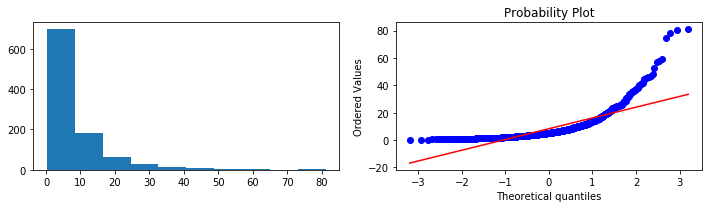

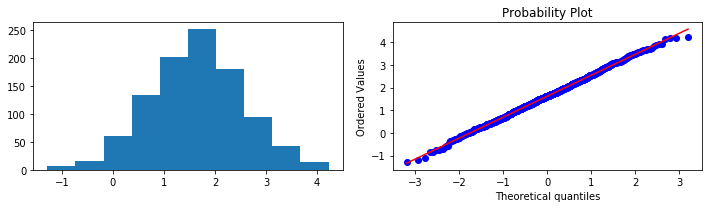

In [6]:
def raw_moment(X, k, c=0):
    return ((X - c)**k).mean()

def central_moment(X, k):
    if k == 1:
        return X.mean()
    return raw_moment(X=X, k=k, c=X.mean())

def print_moments(X,label):
    print(label+" mean:",central_moment(X,1))
    print(label+" var:" ,central_moment(X,2))
    print(label+" skew:",central_moment(X,3))
    print(label+" kurtosis:",central_moment(X,4))

N=100000
y_norm = stats.norm.rvs(size=N)
print_moments(y_norm,"normal")

df=10
y_chi2 = stats.chi2.rvs(size=N,df=df)
print_moments(y_chi2,"chi2 df "+str(df))

y_cauchy = stats.cauchy.rvs(size=N)
print_moments(y_cauchy,"cauchy")

#Lastly, we should mention that there are a lot of powerful tools to use the cdf of a distribtuion to warp 
#the x-axis so that we can make distribtuions appear gaussian. 
#One method to do this is the box-cox
# generate non-normal sample
x = stats.lognorm.rvs(s=1, loc=0, scale=5, size=1000, random_state=4)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(x)
stats.probplot(x, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# box-cox transform
xt, lmbda = stats.boxcox(x)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

Now I am not really doing justice to the above, but moments are in fact incredibly useful. A chunk of my PhD thesis is dedicated to using moments of a Gaussian (cumulants) to model distributions with a small amount of data. Ask me about this. 

You have probably noticed that I didn't bother to compute integrals to get the moments. Instead I did what is referred to as Monte-Carlo Integration (or more generally bootstrapping) where I just sampled a distribtuion and integrated by sampling. Namely 
\begin{equation}
E[x^{n}p(x)] = \int_{-\infty}^{\infty} x^{n} p(x) dx = \sum_{i=1}^{N} x_{i}^{n}
\end{equation}
Where here the $x_{i}\in p(x)$ are sampled from the probability distribtuion function. So what happens, when we have a distribution, but we don't know the analytic form. How can we sample it?  

There are a lot of ways to do this, perhaps the best well known is markov chain monte carlo. However the simplest is to just turn our distribution into a 2D image and random sample points on the image. Instead of writing the points out lets just do it. 


('Pi (4*area):', 3.096, '+/-', 0.09790411635881303)


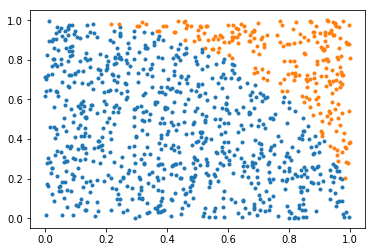

     fun: -803.3955308825884
    nfev: 17
     nit: 11
 success: True
       x: -5.528801125219663
     fun: 12.499898490238554
    nfev: 14
     nit: 10
 success: True
       x: 0.6099371784012563


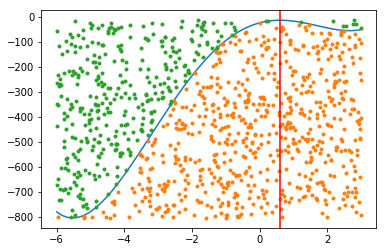

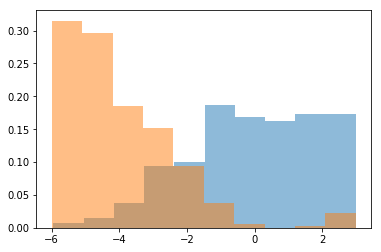

In [17]:
#First lets just compute the area of a quarter circle with radius 1
def quarterarea(iN):
    area=0
    lXin = np.array([])
    lYin = np.array([])
    lXout = np.array([])
    lYout = np.array([])
    for i0 in range(iN):
        pX = np.random.uniform(0,1)
        pY = np.random.uniform(0,1)
        if math.sqrt(pX**2+pY**2) < 1:
            lXin = np.append(lXin,pX)
            lYin = np.append(lYin,pY)
            area += 1
        else:
            lXout = np.append(lXout,pX)
            lYout = np.append(lYout,pY)
    return (float(area)/float(iN)),lXin,lYin,lXout,lYout
lN=1000
a,lXin,lYin,lXout,lYout=quarterarea(lN)
print("Pi (4*area):",a*4,"+/-",4*a/math.sqrt(lN)) #gotta put an uncertainty
plt.plot(lXin,lYin,marker='.',linestyle = 'None')
plt.plot(lXout,lYout,marker='.',linestyle = 'None')
plt.show()

#Now lets consider integrating some random function
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

def fneg(x):
    return -1*(x**4 + 3*(x-2)**3 - 15*(x)**2 + 1)

#First thing is to define a range
xmin=-6
xmax=3
x = np.linspace(xmin, xmax, 100)
sol=opt.minimize_scalar(f,bounds=(xmin, xmax), method='Brent')
print(sol)
ymin=sol.fun
sol=opt.minimize_scalar(fneg,bounds=(xmin, xmax), method='Brent')
print(sol)
ymax=-1*sol.fun
lXin = np.array([])
lYin = np.array([])
lXout = np.array([])
lYout = np.array([])
for i0 in range(lN):
    pX = abs(xmax-xmin)*np.random.uniform(0,1)+xmin
    pY = abs(ymax-ymin)*np.random.uniform(0,1)+ymin
    pYMin = f(pX)
    if pY < pYMin:
        lXin = np.append(lXin,pX)
        lYin = np.append(lYin,pY)
    else:
        lXout = np.append(lXout,pX)
        lYout = np.append(lYout,pY)

plt.plot(x, f(x));
plt.plot(lXin,lYin,marker='.',linestyle = 'None')
plt.plot(lXout,lYout,marker='.',linestyle = 'None')
plt.axvline(sol.x, c='red')
plt.show()
plt.hist(lXin,alpha=0.5,density=True)
plt.hist(lXout,alpha=0.5,density=True)
plt.show()

This procedure is known as "Area-based" sampling, and is considered a method of Monte-Carlo Integration. Monte-Carlo integration is a rich field. All High energy physics simulations are based on it. Basically our function we sample from starts with the a collision and computing the probability that this could be any other collision. We then proceed to put this single collision through a point by point simulation, of each particle going through all the detectors. Finally we aggregate our distributions based on this. You will see the usefulness of Monte Carlo Simulation next week. 

There is a lot more you can do see here : https://colab.research.google.com/drive/1nU4E_pFWjSFPNigzy8-LcJpef26IKY6x?usp=sharing 

Ok, so I have just dumped a whole toolkit of statistical tools on you after we did our original fit to the expansion of the universe. Lets go back and analyze our fit again and see if we can make some conclusions. Recall that we started the previous lecture by looking at the fit residuals. Lets now do this. However, now lets divide by teh uncertainty in each measured point, to see how well our fit is behaving. 


In [3]:
#Lets try to understand how good the fits we made in last class are, lets load the supernova data again
label='sn_z_mu_dmu_plow_union2.1.txt'
def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=math.log(10)/5.
    return const*(10**power)*iMuErr

redshift=np.array([])
distance=np.array([])
distance_err=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        if float(row[1]) > 0.1:
            continue
        redshift = np.append(redshift,float(row[1]))
        distance = np.append(distance,distanceconv(float(row[2])))
        distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))


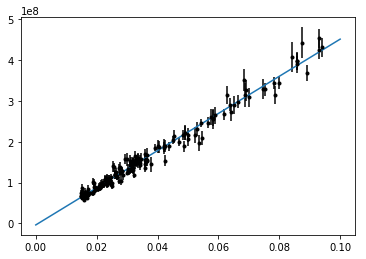

('residuals mean:', 0.0674380962700456)
('residuals var:', 0.9619236126333892)
('residuals skew:', 0.1553936844426706)
('residuals kurtosis:', 3.274051707095445)
('normal distribution mean:', -0.00011862655103129694)
('normal distribution var:', 0.9965166415185851)
('normal distribution skew:', -0.003102949938835852)
('normal distribution kurtosis:', 3.201743190689851)


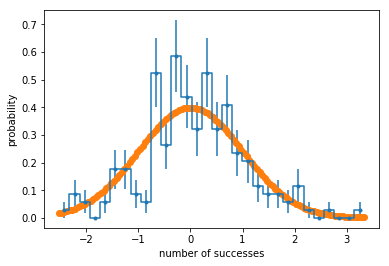

('Total chi2:', 169.1325141558355, 'NDOF', 173)
('Normalized chi2:', 0.977644590496159)
('Probability of chi2:', 0.5688982622097782)


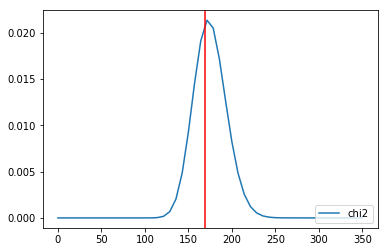

In [42]:
#Lets run the regression again
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

def linear(ix,ia,ib):
    return ia*ix+ib

var=variance(redshift)
cov=covariance(redshift,distance)
slope=cov/var
const=distance.mean()-slope*redshift.mean()
xvals = np.linspace(0,0.1,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,slope,const))

plt.plot(xvals,yvals)
plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.show()
#Now to compute the uncertainty
residuals=np.array([])
for i0 in range(len(redshift)):
    pResid=linear(redshift[i0],slope,const)-distance[i0]
    residuals = np.append(residuals,pResid/distance_err[i0])
    #residuals = np.append(residuals,pResid**2)
#This time we are going to look at a histogram of the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],0.05)
normal=stats.norm.pdf(k,0,1)
normalpoints=stats.norm.rvs(0,1,1000)
#First lets look at the moments 
print_moments(residuals,"residuals")
print_moments(normalpoints,"normal distribution")

#Now lets plot it
plt.plot(k,normal,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#now lets look at the chi2
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

#Lets plot it for good measure too
x = np.linspace(0,len(residuals)*2)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

The above is what we call a perfect fit. You can sleep well at night knowning a linear function fits the restricted data.  Now! What about the unrestricted data. 

In [4]:
redshift=np.array([])
distance=np.array([])
distance_err=np.array([])
with open(label,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter='\t')
    for row in plots:
        redshift = np.append(redshift,float(row[1]))
        distance = np.append(distance,distanceconv(float(row[2])))
        distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))


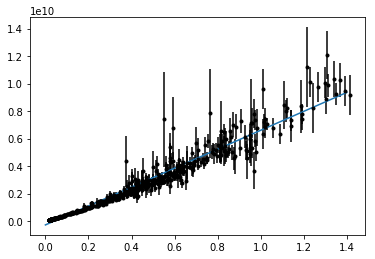

('residuals mean:', -5.4690139399836575)
('residuals var:', 134.2507160558813)
('residuals skew:', -2673.0893464472424)
('residuals kurtosis:', 92943.88421254256)
('normal distribution mean:', -0.012634043032040847)
('normal distribution var:', 1.075505364902212)
('normal distribution skew:', 0.0324168261364795)
('normal distribution kurtosis:', 3.3121479105117113)


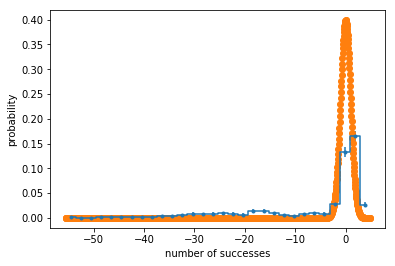

('Total chi2:', 95213.28112833778, 'NDOF', 578)
('Normalized chi2:', 164.72886008362937)
('Probability of chi2:', 0.0)


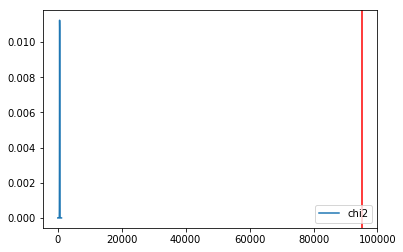

In [44]:
var=variance(redshift)
cov=covariance(redshift,distance)
slope=cov/var
const=distance.mean()-slope*redshift.mean()
xvals = np.linspace(0,1.4,100)
yvals = []
for pX in xvals:
    yvals.append(linear(pX,slope,const))

plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.plot(xvals,yvals)
plt.show()
#Now to compute the uncertainty
residuals=np.array([])
for i0 in range(len(redshift)):
    pResid=linear(redshift[i0],slope,const)-distance[i0]
    residuals = np.append(residuals,pResid/distance_err[i0])
    #residuals = np.append(residuals,pResid**2)
#This time we are going to look at a histogram of the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],0.05)
normal=stats.norm.pdf(k,0,1)
normalpoints=stats.norm.rvs(0,1,1000)
#First lets look at the moments 
print_moments(residuals,"residuals")
print_moments(normalpoints,"normal distribution")

#Now lets plot it
plt.plot(k,normal,'o-')
plt.xlabel("number of successes")
plt.ylabel("probability")
plt.show()

#now lets look at the chi2
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

#Lets plot it for good measure too
x = np.linspace(0,len(residuals)*2)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

This is what we technically call a "Shit Fit". We knew this already, but now we have put a barrage of statistical tools that confirmed our chi-by-Eye  assesment. Now Lets go and run our fit function that included the parameters of the universe. Last time we did this with lmfit. This time, we are just going to do it with scipy optimize. 

In [16]:
#We are not going to plot the fit first, lets just use our barrage of statistics to check if its ok
def hubble(z,Om):
    pVal=Om*(1+z)**3+(1.-Om)
    return np.sqrt(pVal)

def lumidistance(x,h0,Om):
    integral=0
    nint=100
    for i0 in range(nint):
        pVal=1./(1e-5+hubble(x*float(i0)/100.,Om))
        integral += pVal*x/float(nint)
    d=(1.+x)*integral*(1e6*3e5/h0)
    return d

def loglike(x):
    lTot=0
    for i0 in range(len(redshift)):
        xtest=lumidistance(redshift[i0],x[0],x[1])
        #lTot = lTot+(distance[i0]-xtest)**2
        lTot = lTot+((1./distance_err[i0])**2)*(distance[i0]-xtest)**2
    return lTot #*0.5 The above is 2 times loglike

def residuals(x):
    residuals=np.array([])
    for i0 in range(len(redshift)):
        pResid=lumidistance(redshift[i0],sol.x[0],sol.x[1])-distance[i0]
        residuals = np.append(residuals,pResid/distance_err[i0])
    return residuals

x0 = np.array([60.,0.2])
ps = [x0]
bnds = ((0, 1000), (0, 1.0))
#sol=opt.minimize(loglike, x0, method='Nelder-Mead',bounds=bnds, tol=1e-6)
sol=opt.minimize(loglike, x0,bounds=bnds, tol=1e-6)
print(sol)
residuals=residuals(sol.x)
print_moments(residuals,"residuals")
chi2=np.sum(residuals**2)
print("Total chi2:",chi2,"NDOF",len(residuals)-2)
print("Normalized chi2:",chi2/(len(residuals)-2))
print("Probability of chi2:",1-stats.chi2.cdf(chi2,(len(residuals)-2)))

      fun: 539.9052666576513
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00060254, -0.00754881])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 39
      nit: 7
   status: 0
  success: True
        x: array([70.42271422,  0.30137182])
('residuals mean:', -0.09679285130407232)
('residuals var:', 0.9215022933461722)
('residuals skew:', 0.0671173185046271)
('residuals kurtosis:', 2.6690200801680217)
('Total chi2:', 539.9052666576517, 'NDOF', 578)
('Normalized chi2:', 0.9340921568471483)
('Probability of chi2:', 0.8699851775027905)


This looks like a good fit. Now lets plot the residuals, the fit function and scan the likelihood for our parameter uncertainties. There is one thing off can you figure it out?

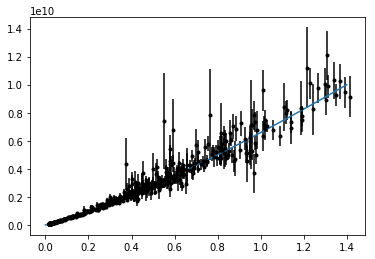

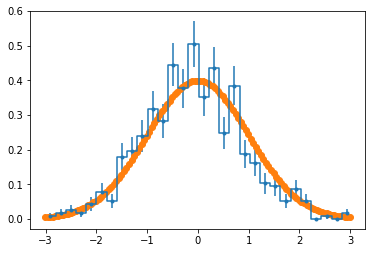

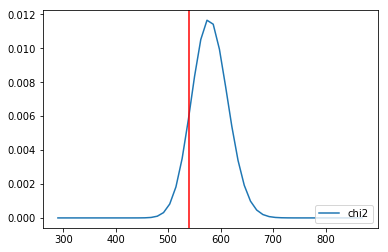

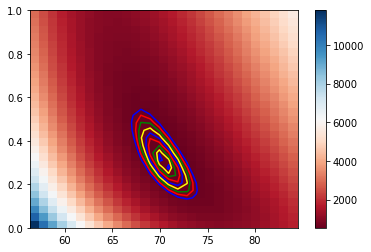

('Unc matrix:', array([[0.34834314,        nan],
       [       nan, 0.02041623]]))
('h0', 70.42271422382339, '+/-', 0.34834313996094823)
('Om:', 0.3013718184298757, '+/-', 0.020416231610485856)


/Users/pharris/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [34]:
#Plot it against the data
xvals = np.linspace(0,1.4,100)
yvals = []
for pX in xvals:
    yvals.append(lumidistance(pX,sol.x[0],sol.x[1]))

plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
plt.plot(xvals,yvals)
plt.show()

#Histogram the residuals
y0, bin_edges = np.histogram(residuals, bins=30)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
k=np.arange(bin_edges[0],bin_edges[-1],0.05)
normal=stats.norm.pdf(k,0,1)
plt.plot(k,normal,'o-')
plt.show()

x = np.linspace(len(residuals)*0.5,len(residuals)*1.5)
chi2d=stats.chi2.pdf(x,len(residuals-2)) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2, c='red')
plt.legend(loc='lower right')

#Now lets scan the parameters
x = np.linspace(sol.x[0]*0.8,sol.x[0]*1.2, 30)
y = np.linspace(0.,1.0, 30)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun
Z = np.array([loglike([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()

#Finally lets get our 1D unctainies from the Hessian
unc=np.sqrt(2*sol.hess_inv.matmat(np.eye(2)))
print("Unc matrix:",unc)
print("h0",sol.x[0],"+/-",unc[0,0])
print("Om:",sol.x[1],"+/-",unc[1,1])

#And lets get the correlations
import numpy.linalg as la
w, v=la.eig(2*sol.hess_inv)
print("values",w,"vectors",v)
#Now lets get the correlation C(a,b) (see below)
print("c(a,b)",v[0,1]/v[0,0])


In [29]:
print(sol.hess_inv.matmat(np.eye(2))[0,0])

0.06067147157892638


Maybe you have figured it out, but our chi2 probability is kind of high, that means our fit is too good a discription of the data. Namely the points are fluctuating less that we expect. This is actually something we often see in physics. We also often see the reverse. Why don't you look at this paper to find out: 
https://arxiv.org/pdf/1612.00778.pdf

Finally, here is a fun read from my friend Mihailo: 
https://arxiv.org/pdf/1603.01204.pdf

2838664324.9011874
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 580
    # variables        = 2
    chi-square         = 539.905267
    reduced chi-square = 0.93409216
    Akaike info crit   = -37.5479587
    Bayesian info crit = -28.8219025
[[Variables]]
    h0:  70.4227272 +/- 0.33557774 (0.48%) (init = 70)
    Om:  0.30137216 +/- 0.01982395 (6.58%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(h0, Om) = -0.741


(<Figure size 432x432 with 2 Axes>,
 <matplotlib.gridspec.GridSpec at 0x135f1d0d0>)

<Figure size 432x288 with 0 Axes>

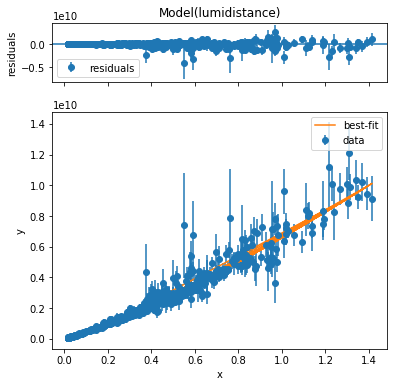

In [31]:
#Now we do it all in one fell swoop!
weights=np.array([])
for pVal in distance_err:
    weights = np.append(weights,1./pVal)

print(lumidistance(0.5,70,0.3))
model  = lmfit.Model(lumidistance)
p = model.make_params(h0=70,Om=0.2)
result = model.fit(data=distance, params=p, x=redshift, weights=weights)
lmfit.report_fit(result)
plt.figure()
result.plot()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 580
    # variables        = 3
    chi-square         = 539.699855
    reduced chi-square = 0.93535504
    Akaike info crit   = -35.7686662
    Bayesian info crit = -22.6795819
[[Variables]]
    h0:   70.5560318 +/- 0.43865457 (0.62%) (init = 70)
    Om:   0.40101405 +/- 0.21085789 (52.58%) (init = 0.2)
    OmL:  0.78991024 +/- 0.19273686 (24.40%) (init = 0.8)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om, OmL) =  0.980
    C(h0, OmL) =  0.693
    C(h0, Om)  =  0.579


<Figure size 432x288 with 0 Axes>

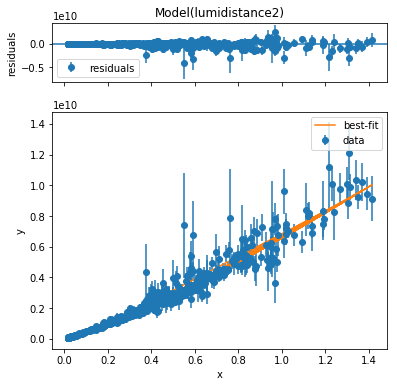

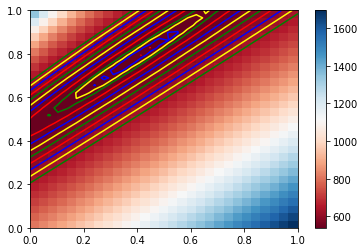

In [38]:
#And finally lets actually float both the matter and dark energy
def hubble2(z,Om,OmL):
    pVal=Om*(1+z)**3+OmL+(1-OmL-Om)*(1+z)**2
    return np.sqrt(pVal)

def lumidistance2(x,h0,Om,OmL):
    integral=0
    nint=100
    for i0 in range(nint):
        pVal=1./(1e-5+hubble2(x*float(i0)/100.,Om,OmL))
        integral += pVal*x/float(nint)
    d=(1.+x)*integral*(1e6*3e5/h0)
    return d

def loglike2(x):
    lTot=0
    for i0 in range(len(redshift)):
        xtest=lumidistance2(redshift[i0],x[0],x[1],x[2])
        #lTot = lTot+(distance[i0]-xtest)**2
        lTot = lTot+((1./distance_err[i0])**2)*(distance[i0]-xtest)**2
    return lTot #*0.5 The above is 2 times loglike


model  = lmfit.Model(lumidistance2)
p = model.make_params(h0=70,Om=0.2,OmL=0.8)
result = model.fit(data=distance, params=p, x=redshift, weights=weights)
lmfit.report_fit(result)
plt.figure()
result.plot()

#result.params["a"].value,result.params["b"].value
#Now lets scan the parameters
x = np.linspace(0,1.5,30)
y = np.linspace(0,1,30)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+loglike2([result.params["h0"],result.params["Om"],result.params["OmL"]])
Z = np.array([loglike2([result.params["h0"],x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()


Now I would like to run through a nother fitting example. Here we are going to look at neutrino oscillations by taking the latest public data from NOVA. To understand Neutrino oscillations, you can read this thesis https://inspirehep.net/files/0a3cd74d55753d242b2a364ce70a5e0e or just look at my intro slides in class. 

For this we are going to fit a well defined functional form to the data and try to extract some parameters. Lets do it! One annoying thing is that we need root to process the data, my root is only in python2. 

neutrino_mode_numu_quartile1
neutrino_mode_numu_quartile2
neutrino_mode_numu_quartile3
neutrino_mode_numu_quartile4
antineutrino_mode_numu_quartile1
antineutrino_mode_numu_quartile2
antineutrino_mode_numu_quartile3
antineutrino_mode_numu_quartile4


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


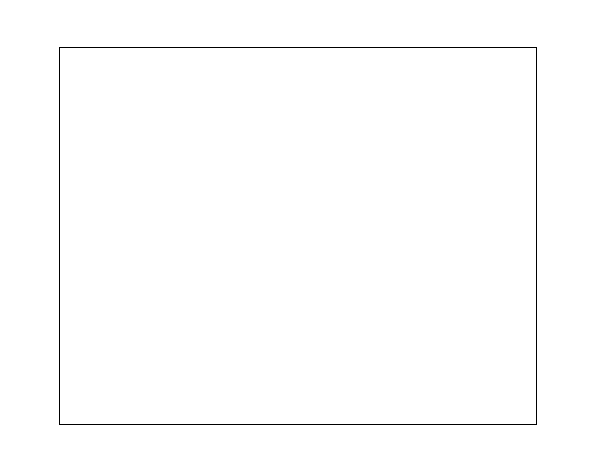

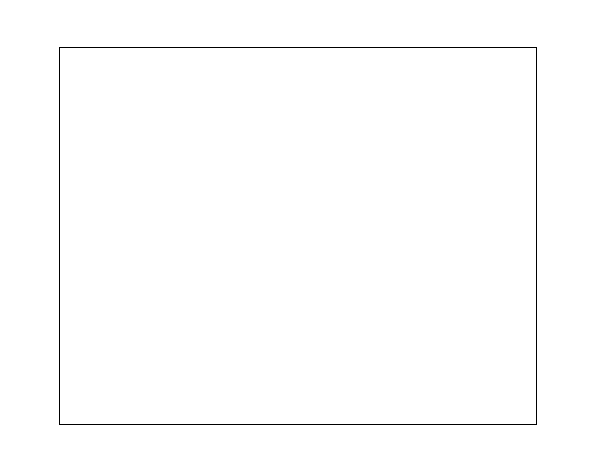

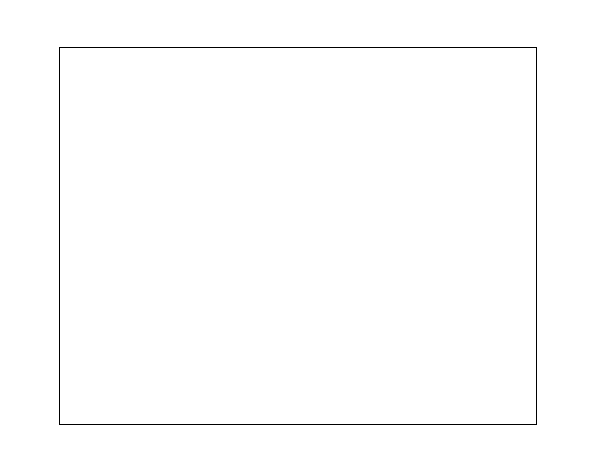

In [39]:
#Some references : https://inspirehep.net/files/0a3cd74d55753d242b2a364ce70a5e0e
#Data Source : https://nova-docdb.fnal.gov/cgi-bin//ShowDocument?docid=46650
#Full Fit results : https://indico.fnal.gov/event/43209/contributions/187840/attachments/130740/159597/NOvA-Oscilations-NEUTRINO2020.pdf
#Forward fhc is regular neutrino
#Reverse rhc is anti neutrino
lFile = r.TFile("NOvA_2020_data_histograms.root")
label="neutrino_mode_numu"
hists0=[]
for i0 in range(4):
    pLabel = label+"_quartile"+str(i0+1)
    print(pLabel)
    pH = lFile.Get(pLabel)
    pH.Sumw2()
    hists0.append(pH)

label="antineutrino_mode_numu"
for i0 in range(4):
    pLabel = label+"_quartile"+str(i0+1)
    print(pLabel)
    pH = lFile.Get(pLabel)
    pH.Sumw2()
    hists0.append(pH)

#lH=hists0[0].Clone("antineutrino")
#lH.Sumw2()
#for i0 in range(3):
#    lH.Add(hists0[i0+1])

hists1=[]
l1File = r.TFile("NOvA_2020_data_release_predictions_with_systs_all_hists.root")
for i0 in range(4):
    pH=l1File.Get("prediction_components_numu_fhc_Quartile"+str(i0+1)+"/NoOscillations_Total_pred")
    hists1.append(pH)
    #print("0:",pH.Integral())
    
for i0 in range(4):
    pH=l1File.Get("prediction_components_numu_rhc_Quartile"+str(i0+1)+"/NoOscillations_Total_pred")
    hists1.append(pH)
    #print("1:",pH.Integral())

lC0 = r.TCanvas("A","A",600,500)
hists1[0].Draw()
for i0 in range(len(hists1)):
    hists1[i0].SetMarkerColor(i0)
    hists1[i0].SetLineColor(i0)
    hists1[i0].Draw("sames")
lC0.Draw()

lC1 = r.TCanvas("B","B",600,500)
hists0[0].Draw()
for i0 in range(len(hists0)):
    hists0[i0].SetMarkerColor(i0)
    hists0[i0].SetLineColor(i0)
    hists0[i0].Draw("sames")
lC1.Draw()


arr=np.zeros(hists1[0].GetNbinsX())
arrerr=np.zeros(hists1[0].GetNbinsX())

aarr=np.zeros(hists1[0].GetNbinsX())
aarrerr=np.zeros(hists1[0].GetNbinsX())

lC2 = r.TCanvas("C","C",600,500)
hists1[0].Draw()
hists1[0].Divide(hists0[0])
for i0 in range(len(hists1)):
    #print("1:",hists0[i0].Integral(),hists1[i0].Integral())
    hists0[i0].Divide(hists1[i0])
    hists0[i0].SetMarkerColor(i0)
    hists0[i0].SetLineColor(i0)
    hists0[i0].Draw("sames")
    if i0 == 0 or i0 == 4:
        continue
    for i1 in range(hists0[i0].GetNbinsX()):
        if i0 < 4:
            arr[i1]    += hists0[i0].GetBinContent(i1+1)
            arrerr[i1] += (hists0[i0].GetBinError(i1+1)*hists0[i0].GetBinError(i1+1))
        else:
            aarr[i1]    += hists0[i0].GetBinContent(i1+1)
            aarrerr[i1] += (hists0[i0].GetBinError(i1+1)*hists0[i0].GetBinError(i1+1))
            
lC2.Draw()
xarr=np.zeros(hists1[0].GetNbinsX())
for i1 in range(hists0[0].GetNbinsX()):
    xarr[i1]   = hists0[0].GetBinCenter(i1)
    arr[i1]     = arr[i1]/3.
    arrerr[i1]  = math.sqrt(arrerr[i1]/3.)
    aarr[i1]    = aarr[i1]/3.
    aarrerr[i1] = math.sqrt(aarrerr[i1]/3.)

lFile.Close()
l1File.Close()


Ok now that we loaded teh data, and did a little bit of cleanup. Lets look at our oscillation data. 

[1.60353337 0.7992596  0.69103603 0.45780693 0.         0.30095388
 0.21212249 0.         0.         0.15223123 0.08544077 0.10663657
 0.07370335 0.14417674 0.21042    0.21295475 0.40092845 0.37171343
 0.42836159]


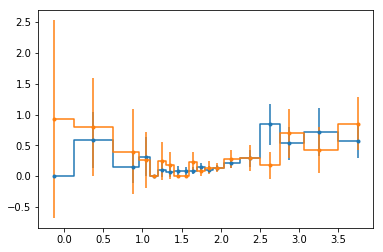

In [40]:
#error
print(aarrerr)
plt.errorbar(xarr,arr,yerr=arrerr,marker='.',drawstyle = 'steps-mid')
plt.errorbar(xarr,aarr,yerr=aarrerr,marker='.',drawstyle = 'steps-mid')
plt.show()

Neutrino oscillations have a very well defined functional form

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 17
    # variables        = 2
    chi-square         = 8.98847237
    reduced chi-square = 0.59923149
    Akaike info crit   = -6.83359741
    Bayesian info crit = -5.16717072
[[Variables]]
    scale1:  2.20898242 +/- 0.09059671 (4.10%) (init = 1)
    scale2:  0.63827847 +/- 0.01818985 (2.85%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(scale1, scale2) =  0.488


<Figure size 432x288 with 0 Axes>

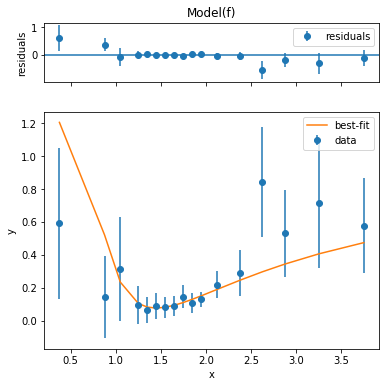

('Fit1 chi2 probability: ', 0.12188057600883614)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 16
    # variables        = 2
    chi-square         = 3.57246877
    reduced chi-square = 0.25517634
    Akaike info crit   = -19.9893093
    Bayesian info crit = -18.4441319
[[Variables]]
    scale1:  2.36479549 +/- 0.08647010 (3.66%) (init = 1)
    scale2:  0.67014430 +/- 0.01754711 (2.62%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(scale1, scale2) =  0.407


<Figure size 432x288 with 0 Axes>

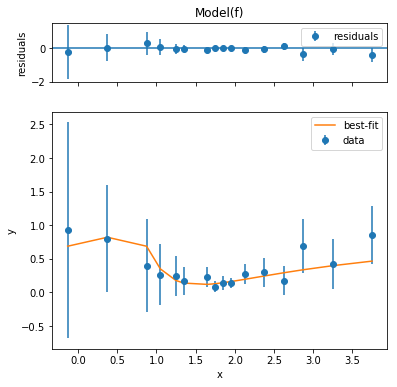

('Fit2 chi2 probability:', 0.002463673732762381)


In [56]:
#deltam=2.44*1e-3
deltam=1*1e-3
L=810
sin2theta23=0.5
def f(x,scale1,scale2):
    xval=1.27*deltam*scale1*L/x
    val=1-4*scale2*(1-scale2)*np.sin(xval)
    #val=1-4*scale2*sin2theta23*(1-sin2theta23)*np.sin(xval)
    return val

xparr=np.array([])
yparr=np.array([])
xpweights=np.array([])
for i0 in range(len(xarr)):
    if arr[i0] > 0:
        xparr   = np.append(xparr,xarr[i0])
        yparr   = np.append(yparr,arr[i0])
        pWeight = 1./float(arrerr[i0])
        xpweights = np.append(xpweights,pWeight)

model  = lmfit.Model(f)
p = model.make_params(scale1=1,scale2=1)
result = model.fit(data=yparr,x=xparr, params=p, weights=xpweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()
print("Fit1 chi2 probability: ",stats.chi2.cdf(result.chisqr,result.nfree))

xcarr=np.array([])
ycarr=np.array([])
xcweights=np.array([])
for i0 in range(len(xarr)):
    if aarr[i0] > 0:
        xcarr   = np.append(xcarr,xarr[i0])
        ycarr   = np.append(ycarr,aarr[i0])
        pWeight = 1./float(aarrerr[i0])
        xcweights = np.append(xcweights,pWeight)
    

model  = lmfit.Model(f)
p = model.make_params(scale1=1,scale2=1)
result = model.fit(data=ycarr,x=xcarr, params=p, weights=xcweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()
print("Fit2 chi2 probability:",stats.chi2.cdf(result.chisqr,result.nfree))

#for i0 in range(len(xcarr)):
#    for i1 in range(len(xparr)):
#        if xparr[i1] == xcarr[i0]:
#            denom=((xcweights[i0])**2+(xpweights[i1])**2) 
#            ycarr[i0]=((xcweights[i0]**2)*ycarr[i0]+(xpweights[i1]**2)*yparr[i1])/denom
#            unctop=(xcweights[i0]**2)+(xpweights[i1]**2)
#            unctop=unctop/denom/denom
#            unctop=np.sqrt(unctop)
#            xcweights[i0]=1./unctop
#model  = lmfit.Model(f)
#p = model.make_params(scale1=1,scale2=1)
#result = model.fit(data=ycarr,x=xcarr, params=p, weights=xcweights)
#print("Fit3 chi2 probability:",stats.chi2.cdf(result.chisqr,result.nfree))
#lmfit.report_fit(result)
#plt.figure()
#result.plot()
#plt.show()



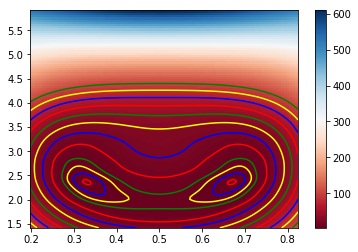

In [57]:
def loglike(x):
    lTot=0
    for val in range(len(ycarr)):
        xtest=f(xcarr[val],x[1],x[0])
        lTot = lTot+(xcweights[val]**2)*(ycarr[val]-xtest)**2
    return lTot

from scipy import optimize as opt
x0 = np.array([1,1])
ps = [x0]
sol=opt.minimize(loglike, x0)
#Look the same answers, now lets plot the chi2
x = np.linspace(sol.x[0]*0.6,sol.x[0]*2.5, 100)
y = np.linspace(sol.x[1]*0.6,sol.x[1]*2.5, 100)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun
Z = np.array([loglike([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()




The likelihood profile is now something a bit different than you are probably used to. What exactly does this mean, well lets look at the 1D scans. How do we quote an uncertainty for this? 

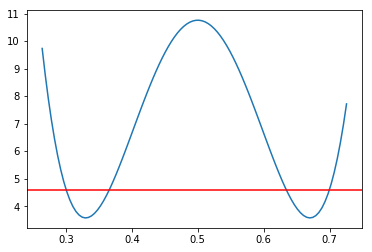

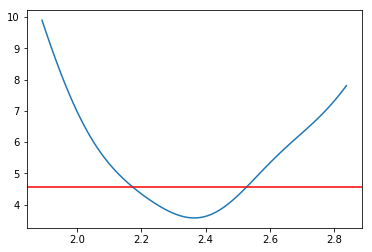

In [61]:
#Now lets fix one parameter at the minimum, and profile the other
x = np.linspace(sol.x[0]*0.8,sol.x[0]*2.2, 100)
y = np.linspace(sol.x[1]*0.8,sol.x[1]*1.2, 100)
plt.plot(x, loglike([x,sol.x[1]]),label='loglike');
plt.axhline(sol.fun+1, c='red')
#from the intercepts, we can get the uncertainties
#def loglikeminX(xval):
#    val=loglike([xval,sol.x[1]])
#    minval=loglike(sol.x)+1
#    return val-minval
#solX1=opt.root_scalar(loglikeminX,bracket=[sol.x[0], sol.x[0]*1.02],method='brentq')
#solX2=opt.root_scalar(loglikeminX,bracket=[sol.x[0]*0.98, sol.x[0]],method='brentq')
#print(sol1,sol2,"1D Uncertainty:",abs(solX2.root-solX1.root)/2.)
plt.show()

#Now for the other parameter
plt.plot(y, loglike([sol.x[0],y]),label='LL');
plt.axhline(sol.fun+1, c='red')
#def loglikeminY(yval):
#    val=loglike([sol.x[0],yval])
#    minval=loglike(sol.x)+1
#    return val-minval
#solY1=opt.root_scalar(loglikeminY,bracket=[sol.x[1],    sol.x[1]*1.2],method='brentq')
#solY2=opt.root_scalar(loglikeminY,bracket=[sol.x[1]*0.8, sol.x[1]],method='brentq')
#print(sol1,sol2,"1D Uncertainty:",abs(solY2.root-solY1.root)/2.)
plt.show()


Now we have two best fits for one parameters. So we have to quote them both. Additionally, we have that our best fit for the ohter parameter is asymmtric. As a result we quote an asymetric uncertainty for the bottom parameter and two best fit parameters for the top. 

Now since there are many experiements that measure this parameters, what if we put a constraint fro the world's best measurements, and then we look at our profile. 

      fun: 10.821170508996905
 hess_inv: array([[2.61647011e-04, 9.42348019e-06],
       [9.42348019e-06, 5.62640153e-04]])
      jac: array([ 2.38418579e-07, -8.34465027e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([0.55960053, 2.44216785])


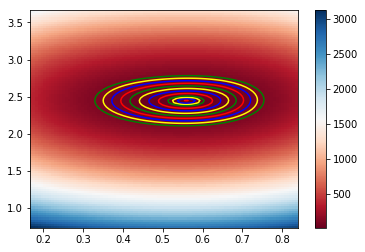

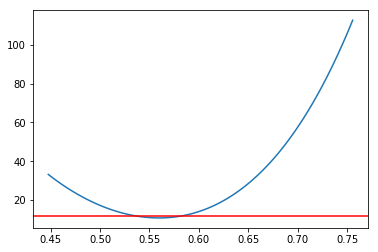

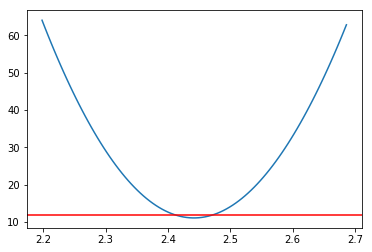

In [68]:
#Now what if we try to add the world's measurement of these parameters into our fit
#https://pdg.lbl.gov/2020/listings/rpp2020-list-neutrino-mixing.pdf
def loglikeWorld(x):
    lTot=0
    for val in range(len(ycarr)):
        xtest=f(xcarr[val],x[1],x[0])
        lTot = lTot+(xcweights[val]**2)*(ycarr[val]-xtest)**2
    sin2worldavg=0.547
    sin2uncavg=0.021
    constraintsin2=((x[0]-sin2worldavg)**2)/(sin2uncavg**2)
    deltamworldavg=2.453
    deltamuncavg=0.034
    constraintdeltam=((x[1]-deltamworldavg)**2)/(deltamuncavg**2)
    return lTot+constraintsin2+constraintdeltam

x0 = np.array([1,1])
ps = [x0]
sol=opt.minimize(loglikeWorld, x0)
print(sol)
#Look the same answers, now lets plot the chi2
x = np.linspace(sol.x[0]*0.3,sol.x[0]*1.5, 100)
y = np.linspace(sol.x[1]*0.3,sol.x[1]*1.5, 100)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2.3,4,9, 16, 25, 36, 49, 64, 81, 100]
for i0 in range(len(levels)):
    levels[i0] = levels[i0]+sol.fun
Z = np.array([loglikeWorld([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
fig, ax = plt.subplots(1, 1)
c = ax.pcolor(X,Y,Z,cmap='RdBu')
fig.colorbar(c, ax=ax)
c = plt.contour(X, Y, Z, levels,colors=['red', 'blue', 'yellow','green'])
plt.show()

#Now lets fix one parameter at the minimum, and profile the other
x = np.linspace(sol.x[0]*0.8,sol.x[0]*1.35, 100)
y = np.linspace(sol.x[1]*0.9,sol.x[1]*1.1, 100)
plt.plot(x, loglikeWorld([x,sol.x[1]]),label='loglike');
plt.axhline(sol.fun+1, c='red')
plt.show()

#Now for the other parameter
plt.plot(y, loglikeWorld([0.547,y]),label='LL');
plt.axhline(sol.fun+1, c='red')
plt.show()
